<a href="https://colab.research.google.com/github/Prince00954/code-with-prince/blob/main/identifying_contours_by_shape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mini Project 2 - Identifiy Contours by Shape

Click 'Take Photo' to capture an image.


<IPython.core.display.Javascript object>

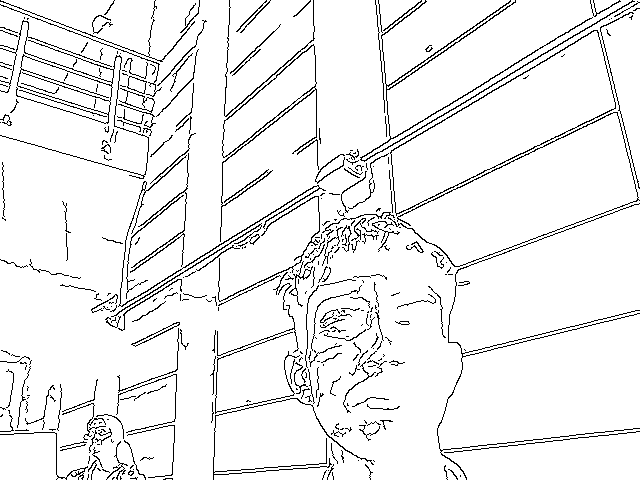

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import base64

# Webcam capture code
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Take Photo';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Sketch function
def sketch(image):
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    img_gray_blur = cv2.GaussianBlur(img_gray, (5,5), 0)
    canny_edges = cv2.Canny(img_gray_blur, 50, 20)
    _, mask = cv2.threshold(canny_edges, 100, 255, cv2.THRESH_BINARY_INV)
    return mask

# Main logic
try:
    print("Click 'Take Photo' to capture an image.")
    filename = take_photo()
    image = cv2.imread(filename)

    if image is not None:
        sketch_img = sketch(image)
        cv2_imshow(sketch_img)
    else:
        print("Failed to read the image.")
except Exception as e:
    print(f"Error occurred: {e}")